# Импорт библиотек

In [64]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

# Функция Растригина

In [65]:
@njit
def f(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = len(x)
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result

# Реализация метода роя частиц на Python с использованием numba

In [66]:
@njit
def main(v_max: float):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [67]:
list_of_all = main(1.9)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 1.0007226852063944 coordinates: [0.98956611]
Размерности совпадают:  True


[ 4.06212765  2.73760813  1.46773443  3.33742822 -1.24599855 -1.24574488
  3.85378394 -1.38161541 -3.89025156 -1.68445659  4.60685683  3.62333369
  3.29022736  4.92249415  5.05143499 -1.07995261  4.59991517 -2.99366298
  3.96919773 -1.69748654 -0.65236378 -2.19692541  4.80454166  3.25348212
 -3.61927718 -3.07656434 -3.03157443 -3.3739935   1.35104448 -0.22697577
 -0.767608   -2.81043389 -1.69633222  1.81076642 -3.67825507  1.72673301
 -2.05534697  2.52494219  3.49648433  1.60794923  3.56803796 -1.62305512
 -1.30669532 -0.65323997 -4.30937137  2.51205908  2.40790023 -1.38648008
  4.51360966  0.58639025] 
 [17.2531581  18.27231607 21.94944884 26.35956698 11.30112029 11.28455531
 18.78313213 19.26765173  1.57334578 16.840185   39.05263703 30.27325813
 23.32632934 25.39346443 26.03467828  2.40179692 39.25252122  2.87836612
 15.94122843  4.71447936 16.18263131 11.55317217 29.72335116 20.80391645
  5.58831031  6.9321941   4.50743603  1.02275542 17.75613978  8.60990361
  4.54716887  1.0007226

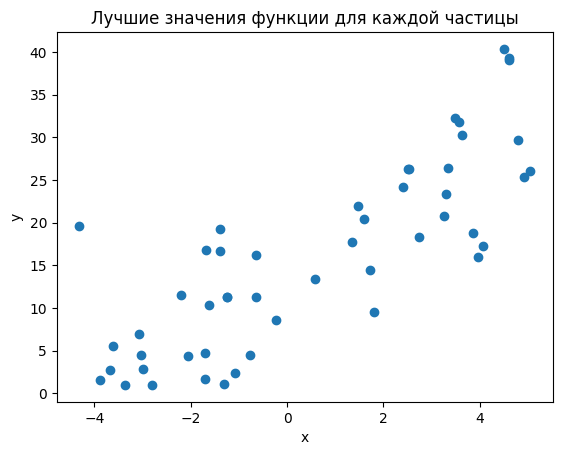

In [68]:
print(list_of_x, "\n", list_of_y)
plt.scatter(list_of_x, list_of_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

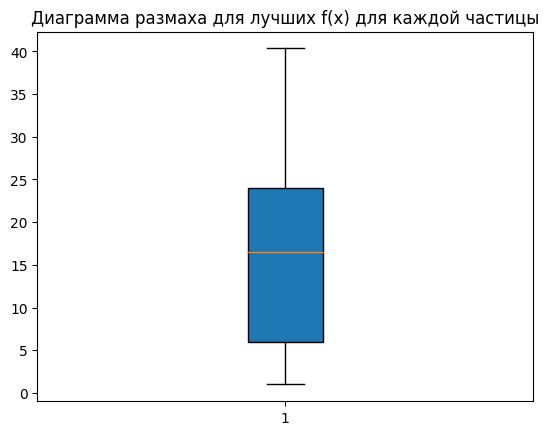

In [69]:
bp = plt.boxplot(list_of_y, patch_artist=True)  # диаграмма размаха для лучших f(x) для каждой частицы
plt.title("Диаграмма размаха для лучших f(x) для каждой частицы")
plt.show()

[ 4.06212765  4.06212765  4.06212765  4.06212765 -1.24599855 -1.24574488
 -1.24574488 -1.24574488 -0.09025156 -0.09025156 -0.09025156 -0.09025156
 -0.09025156 -0.09025156 -0.09025156 -0.09025156 -0.09025156 -0.09025156
 -0.09025156 -0.09025156 -0.09025156 -0.09025156 -0.09025156 -0.09025156
 -0.09025156 -0.09025156 -0.09025156  0.98311159  0.98311159  0.98311159
  0.98311159  0.98956611  0.98956611  0.98956611  0.98956611  0.98956611
  0.98956611  0.98956611  0.98956611  0.98956611  0.98956611  0.98956611
  0.98956611  0.98956611  0.98956611  0.98956611  0.98956611  0.98956611
  0.98956611  0.98956611] 
 [17.2531581  17.2531581  17.2531581  17.2531581  11.30112029 11.28455531
 11.28455531 11.28455531  1.57334578  1.57334578  1.57334578  1.57334578
  1.57334578  1.57334578  1.57334578  1.57334578  1.57334578  1.57334578
  1.57334578  1.57334578  1.57334578  1.57334578  1.57334578  1.57334578
  1.57334578  1.57334578  1.57334578  1.02275542  1.02275542  1.02275542
  1.02275542  1.0007226

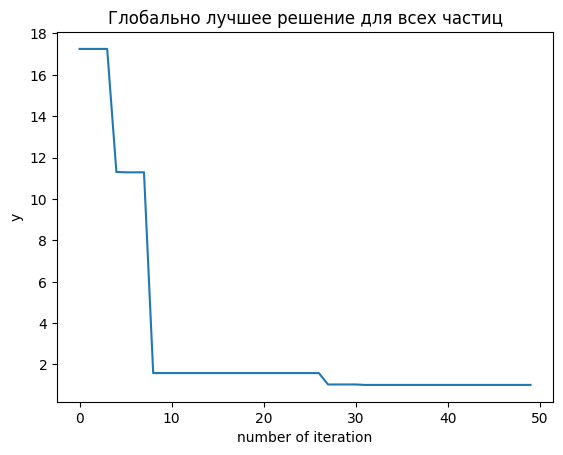

In [70]:
print(list_of_best_coord, "\n", list_of_best_solution)
plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution)
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()